In [1]:
NET_KEYS = ["ABI", "ATL", "POL"]
NET_LABELS = [r'\textsc{Abilene}', r'\textsc{Atlanta}', r'\textsc{Polska}']

SETTING_KEYS = ["C1", "C3", "C13"]
SETTING_LABELS = [r'$k_1$-only', r'$k_2$-only', r'flexible']

# SOLVER_KEYS = ["GREEDY", "ILP_GUROBI"]
# SOLVER_LABELS = [r'\texttt{CLC}-\texttt{SE}', r'\texttt{ILP}-\texttt{SE}']

SOLVER_KEYS = ["ILP_GUROBI", "GREEDY"]
SOLVER_LABELS = [r'\texttt{ILP}-\texttt{SE}', r'\texttt{CLC}-\texttt{SE}']

CONFIG_KEYS = ["type1", "type3"]
CONFIG_LABELS = [r'$k_1$', r'$k_2$']

In [2]:
figsize = (8,8)
dpi = 100

barwidth = 10
# colors = ['grey','goldenrod','wheat']
colors = ['goldenrod','grey','wheat']
hatchs = [".","//", "", "o"]
# fcolors = ['lightgrey', 'w', 'wheat', 'w']
fcolors = ['wheat', 'w', 'lightgrey','w']
fhatchs = ['//', '.']

step = 1
groupstep = 50

In [3]:
# PLT SETUP

import matplotlib.pyplot as plt
import numpy as np
import collections
import math

plt.rcParams['text.usetex'] = True
plt.rc('font', family='sans-serif', size=33)

FIGPATH = f"./data/figures"

In [4]:
import pandas as pd

def clean_data(df):
    # Drop columns: 'solutionstatus', 'problemname', 'status'
    df = df.drop(columns=['solutionstatus', 'problemname', 'status'])
    return df

# Loaded variable 'df' from URI: e:\repos\graphmapping-flexv2\data\results\20240711_222052.csv
df = pd.read_csv(r'e:\repos\graphmapping-flexv2\data\results\20240722_164651.csv')

df_clean = clean_data(df.copy())
df_clean.head()

,setname,solvername,objvalue,runtime
0,C13_ABI_10,GREEDY,3,0.811046
1,C13_ABI_10,ILP_GUROBI,5,70.513386
2,C13_ATL_10,GREEDY,4,1.225470
3,C13_ATL_10,ILP_GUROBI,7,227.561142
4,C13_POL_10,GREEDY,3,1.127835


In [5]:
SETNAME_GROUPS = df_clean.groupby("setname").groups
SOLVERNAME_GROUPS = df_clean.groupby("solvername").groups

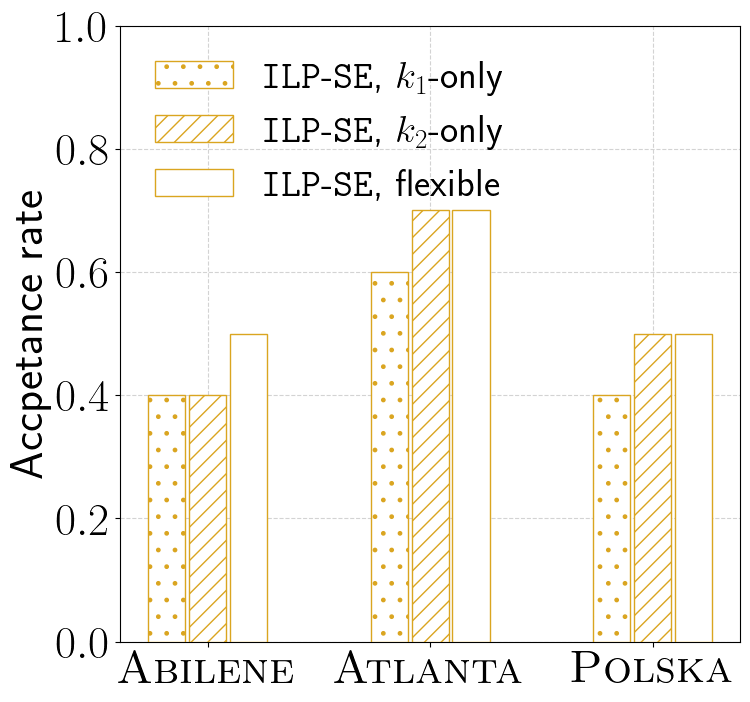

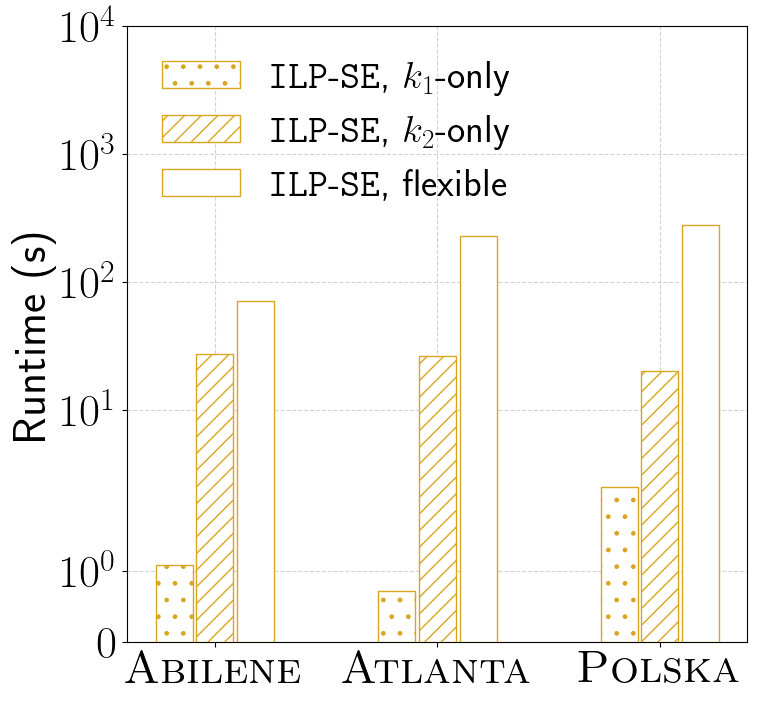

In [6]:
x_base = 0
solvername = "ILP_GUROBI"
slicecount = 10

obj_plt = plt.figure(0, figsize=figsize, dpi=dpi)
time_plt = plt.figure(1, figsize=figsize, dpi=dpi)


xticks_loc = [x_base+i*(groupstep+barwidth)+math.floor(len(SETTING_KEYS)/2)*(step+barwidth) for i in range(len(NET_KEYS))]
for net_key_ind in range(len(NET_KEYS)):
    net_key = NET_KEYS[net_key_ind]
    
    for setting_key_ind in range(len(SETTING_KEYS)):
        setting_key = SETTING_KEYS[setting_key_ind]
        setname = f"{setting_key}_{net_key}_{slicecount}"
        
        # print(setname, solvername)
        setname_ind = SETNAME_GROUPS[setname]
        solvername_ind = SOLVERNAME_GROUPS[solvername]
        
        loc = [i for i in setname_ind if i in solvername_ind]
        
        if not len(loc) == 1:
            continue
        
        loc = loc[0]
        
        data = df_clean.loc[loc]
        
        acc = data["objvalue"]/slicecount
        time = data["runtime"]
        
        plt.figure(0)
        plt.bar(
            x=x_base + net_key_ind*(barwidth+groupstep) + setting_key_ind*(barwidth+step),
            height=acc,
            width=barwidth,
            edgecolor=colors[0],
            hatch=hatchs[setting_key_ind],
            label=f"{SOLVER_LABELS[0]}, {SETTING_LABELS[setting_key_ind]}" if net_key_ind == 0 else None,
            fill=True,
            color='w',
            zorder=3
        )
        
        plt.figure(1)
        plt.bar(
            x=x_base + net_key_ind*(barwidth+groupstep) + setting_key_ind*(barwidth+step),
            height=time,
            width=barwidth,
            edgecolor=colors[0],
            hatch=hatchs[setting_key_ind],
            label=f"{SOLVER_LABELS[0]}, {SETTING_LABELS[setting_key_ind]}" if net_key_ind == 0 else None,
            fill=True,
            color='w',
            zorder=3
        )
        
plt.figure(0)
plt.ylabel(r"Accpetance rate")
# plt.figure()
plt.grid(color='lightgrey', linestyle='--', zorder=0)
plt.ylim([0,1])
plt.legend(loc='upper left', ncols=1, prop={'size':28}, framealpha=0)
plt.xticks(ticks=xticks_loc, labels=NET_LABELS)
plt.savefig(f"{FIGPATH}/ilp_conf.pdf",bbox_inches='tight')
# plt.show()

plt.figure(1)
plt.ylabel(r"Runtime (s)")
# plt.figure()
plt.grid(color='lightgrey', linestyle='--', zorder=0)
plt.yscale("symlog")
plt.ylim([0,10**4])
plt.legend(loc='upper left', ncols=1, prop={'size':28}, framealpha=0)
plt.xticks(ticks=xticks_loc, labels=NET_LABELS)
plt.savefig(f"{FIGPATH}/ilp_runtime.pdf",bbox_inches='tight')
plt.show()

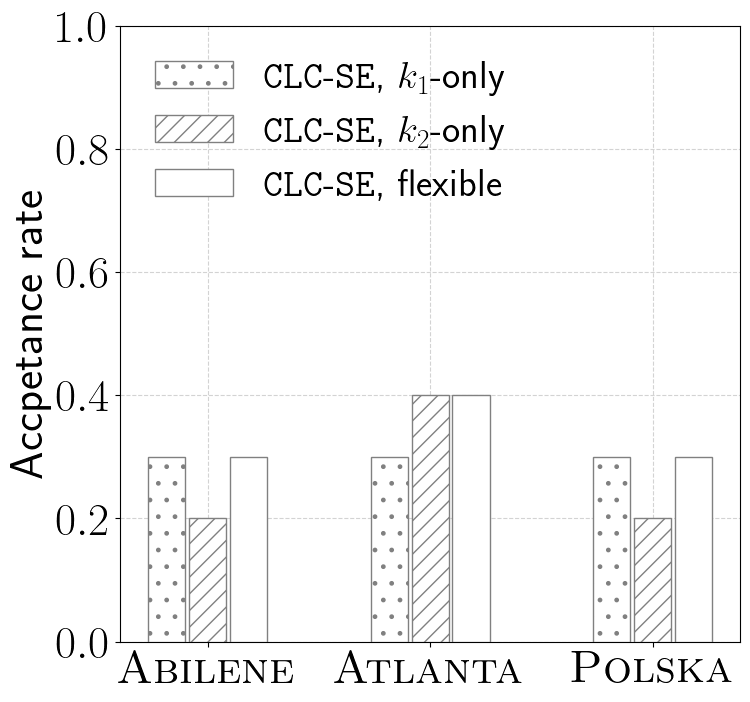

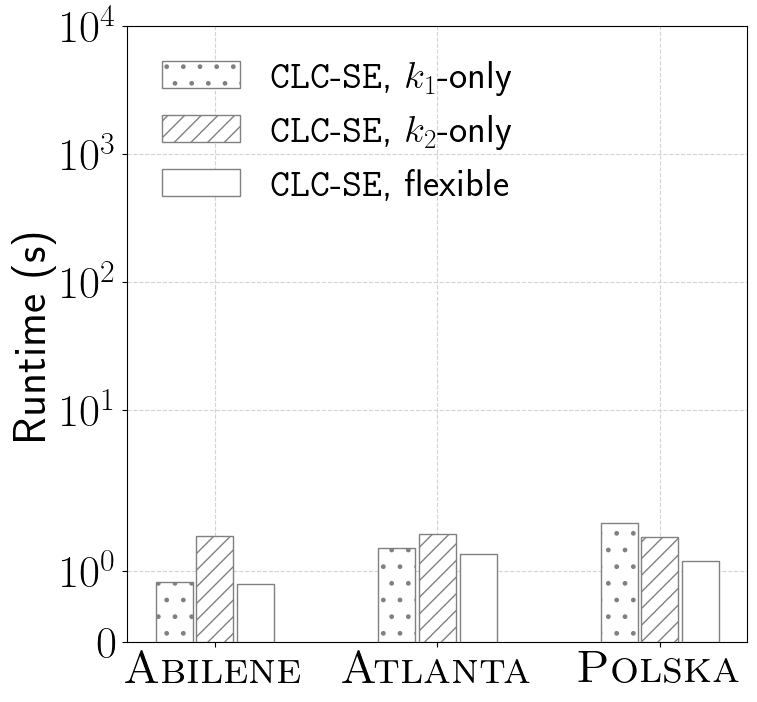

In [7]:
x_base = 0
solvername = "GREEDY"
slicecount = 10

obj_plt = plt.figure(0, figsize=figsize, dpi=dpi)
time_plt = plt.figure(1, figsize=figsize, dpi=dpi)


xticks_loc = [x_base+i*(groupstep+barwidth)+math.floor(len(SETTING_KEYS)/2)*(step+barwidth) for i in range(len(NET_KEYS))]
for net_key_ind in range(len(NET_KEYS)):
    net_key = NET_KEYS[net_key_ind]
    
    for setting_key_ind in range(len(SETTING_KEYS)):
        setting_key = SETTING_KEYS[setting_key_ind]
        setname = f"{setting_key}_{net_key}_{slicecount}"
        
        # print(setname, solvername)
        setname_ind = SETNAME_GROUPS[setname]
        solvername_ind = SOLVERNAME_GROUPS[solvername]
        
        loc = [i for i in setname_ind if i in solvername_ind]
        
        if not len(loc) == 1:
            continue
        
        loc = loc[0]
        
        data = df_clean.loc[loc]
        
        acc = data["objvalue"]/slicecount
        time = data["runtime"]
        
        plt.figure(0)
        plt.bar(
            x=x_base + net_key_ind*(barwidth+groupstep) + setting_key_ind*(barwidth+step),
            height=acc,
            width=barwidth,
            edgecolor=colors[1],
            hatch=hatchs[setting_key_ind],
            label=f"{SOLVER_LABELS[1]}, {SETTING_LABELS[setting_key_ind]}" if net_key_ind == 0 else None,
            fill=True,
            color='w',
            zorder=3
        )
        
        plt.figure(1)
        plt.bar(
            x=x_base + net_key_ind*(barwidth+groupstep) + setting_key_ind*(barwidth+step),
            height=time,
            width=barwidth,
            edgecolor=colors[1],
            hatch=hatchs[setting_key_ind],
            label=f"{SOLVER_LABELS[1]}, {SETTING_LABELS[setting_key_ind]}" if net_key_ind == 0 else None,
            fill=True,
            color='w',
            zorder=3
        )
        
plt.figure(0)
plt.ylabel(r"Accpetance rate")
# plt.figure()
plt.grid(color='lightgrey', linestyle='--', zorder=0)
plt.ylim([0,1])
plt.legend(loc='upper left', ncols=1, prop={'size':28}, framealpha=0)
plt.xticks(ticks=xticks_loc, labels=NET_LABELS)
plt.savefig(f"{FIGPATH}/clc_conf.pdf",bbox_inches='tight')
# plt.show()

plt.figure(1)
plt.ylabel(r"Runtime (s)")
# plt.figure()
plt.grid(color='lightgrey', linestyle='--', zorder=0)
plt.yscale("symlog")
plt.ylim([0,10**4])
plt.legend(loc='upper left', ncols=1, prop={'size':28}, framealpha=0)
plt.xticks(ticks=xticks_loc, labels=NET_LABELS)
plt.savefig(f"{FIGPATH}/clc_runtime.pdf",bbox_inches='tight')
plt.show()

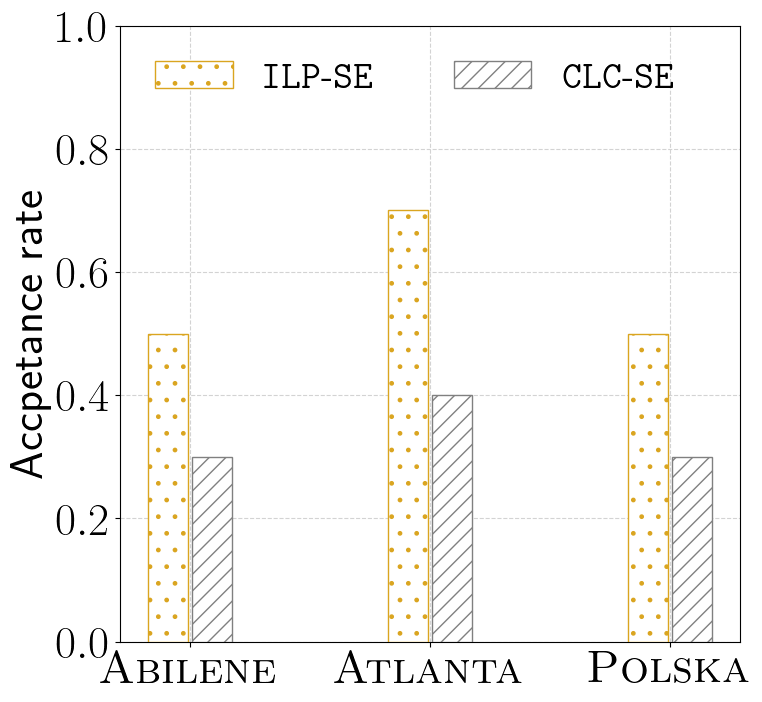

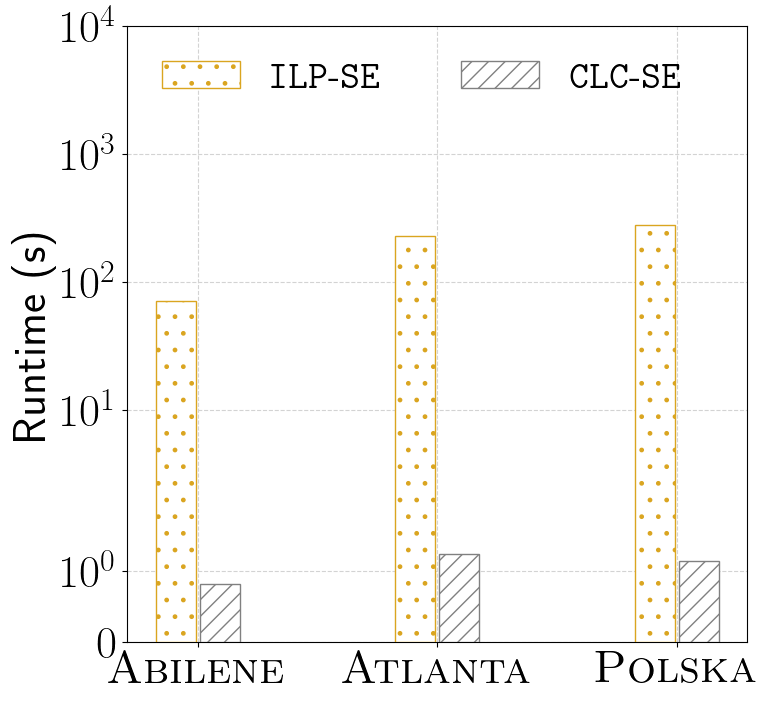

In [8]:
x_base = 0
setting_key = "C13"
slicecount = 10

obj_plt = plt.figure(0, figsize=figsize, dpi=dpi)
time_plt = plt.figure(1, figsize=figsize, dpi=dpi)


xticks_loc = [x_base+i*(groupstep+barwidth)+(math.floor(len(SOLVER_KEYS)/2)-0.5)*(step+barwidth) for i in range(len(NET_KEYS))]

for net_key_ind in range(len(NET_KEYS)):
    net_key = NET_KEYS[net_key_ind]
    
    for solver_key_ind in range(len(SOLVER_KEYS)):
        solver_key = SOLVER_KEYS[solver_key_ind]
        
        setname = f"{setting_key}_{net_key}_{slicecount}"
        
        # print(setname, solvername)
        setname_ind = SETNAME_GROUPS[setname]
        solvername_ind = SOLVERNAME_GROUPS[solver_key]
        
        loc = [i for i in setname_ind if i in solvername_ind]
        
        if not len(loc) == 1:
            continue
        
        loc = loc[0]
        
        data = df_clean.loc[loc]
        
        acc = data["objvalue"]/slicecount
        time = data["runtime"]
        
        plt.figure(0)
        plt.bar(
            x=x_base + net_key_ind*(barwidth+groupstep) + solver_key_ind*(barwidth+step),
            height=acc,
            width=barwidth,
            edgecolor=colors[solver_key_ind],
            hatch=hatchs[solver_key_ind],
            label=SOLVER_LABELS[solver_key_ind] if net_key_ind == 0 else None,
            fill=True,
            color='w',
            zorder=3
        )
        
        plt.figure(1)
        plt.bar(
            x=x_base + net_key_ind*(barwidth+groupstep) + solver_key_ind*(barwidth+step),
            height=time,
            width=barwidth,
            edgecolor=colors[solver_key_ind],
            hatch=hatchs[solver_key_ind],
            label=SOLVER_LABELS[solver_key_ind] if net_key_ind == 0 else None,
            fill=True,
            color='w',
            zorder=3
        )
        
plt.figure(0)
plt.ylabel(r"Accpetance rate")
# plt.figure()
plt.grid(color='lightgrey', linestyle='--', zorder=0)
plt.ylim([0,1])
plt.legend(loc='upper left', ncols=2, prop={'size':28}, framealpha=0)
plt.xticks(ticks=xticks_loc, labels=NET_LABELS)
plt.savefig(f"{FIGPATH}/objective.pdf",bbox_inches='tight')
# plt.show()

plt.figure(1)
plt.ylabel(r"Runtime (s)")
# plt.figure()
plt.grid(color='lightgrey', linestyle='--', zorder=0)
plt.ylim([0,10**4])
plt.yscale("symlog")
plt.legend(loc='upper left', ncols=2, prop={'size':28}, framealpha=0)
plt.xticks(ticks=xticks_loc, labels=NET_LABELS)
plt.savefig(f"{FIGPATH}/runtime.pdf",bbox_inches='tight')
plt.show()

In [9]:
# Loaded variable 'df' from URI: e:\repos\graphmapping-flexv2\data\results\configcount_20240711_222100.csv
import pandas as pd
df = pd.read_csv(r'e:\repos\graphmapping-flexv2\data\results\configcount_20240722_164657.csv')

df_clean = df

In [10]:
SETNAME_GROUPS = df_clean.groupby("setname").groups
SOLVERNAME_GROUPS = df_clean.groupby("solvername").groups
CONFIG_GROUPS = df_clean.groupby("config").groups

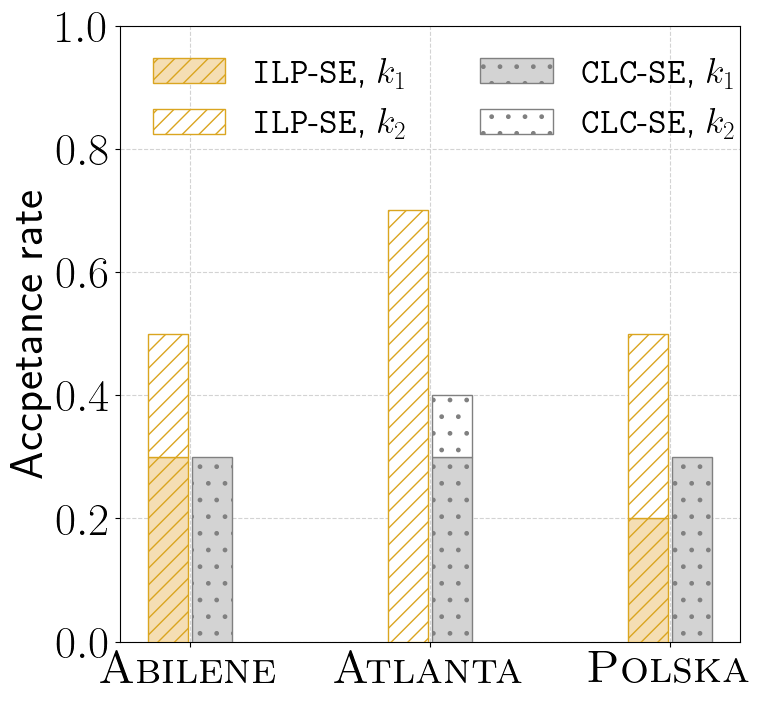

In [11]:
x_base = 0
setting_key = "C13"
slicecount = 10

obj_plt = plt.figure(0, figsize=figsize, dpi=dpi)

xticks_loc = [x_base+i*(groupstep+barwidth)+(math.floor(len(SOLVER_KEYS)/2)-0.5)*(step+barwidth) for i in range(len(NET_KEYS))]

used_label = []

for net_key_ind in range(len(NET_KEYS)):
    net_key = NET_KEYS[net_key_ind]
    
    for solver_key_ind in range(len(SOLVER_KEYS)):
        solver_key = SOLVER_KEYS[solver_key_ind]
        
        setname = f"{setting_key}_{net_key}_{slicecount}"
        
        # print(setname, solvername)
        setname_ind = SETNAME_GROUPS[setname]
        solvername_ind = SOLVERNAME_GROUPS[solver_key]
        
        y_bottom = 0
        for config_key_ind in range(len(CONFIG_KEYS)):
            config_key = CONFIG_KEYS[config_key_ind]
            config_ind = CONFIG_GROUPS[config_key]
                    
            loc = [i for i in setname_ind if i in solvername_ind and i in config_ind]

            if not len(loc) == 1:
                continue
            
            loc = loc[0]

            data = df_clean.loc[loc]
            
            data = 0 if data is None else data["configcount"]

            acc = data/slicecount

            # print(setname, solver_key, config_key, acc)

            plt.figure(0)
            
            label_current = f"{SOLVER_LABELS[solver_key_ind]}, {CONFIG_LABELS[config_key_ind]}"
            if label_current in used_label:
                label_current = None
            else:
                used_label.append(label_current)
            plt.bar(
                x=x_base + net_key_ind*(barwidth+groupstep) + solver_key_ind*(barwidth+step),
                height=acc,
                width=barwidth,
                edgecolor=colors[solver_key_ind],
                hatch=fhatchs[solver_key_ind],
                label=label_current,
                fill=True,
                color=fcolors[solver_key_ind+config_key_ind+1*solver_key_ind],
                zorder=3,
                bottom=y_bottom
            )
            y_bottom = acc
        
plt.figure(0)
plt.ylabel(r"Accpetance rate")
# plt.figure()
plt.grid(color='lightgrey', linestyle='--', zorder=0)
plt.ylim([0,1])
plt.legend(loc='upper left', ncols=2, prop={'size':26}, framealpha=0)
plt.xticks(ticks=xticks_loc, labels=NET_LABELS)
plt.savefig(f"{FIGPATH}/acc_by_conf.pdf",bbox_inches='tight')
# plt.show()

plt.show()

In [12]:
import pandas as pd

def clean_data(df):
    # Drop columns: 'solutionstatus', 'problemname', 'status'
    df = df.drop(columns=['problemname'])
    return df

# Loaded variable 'df' from URI: e:\repos\graphmapping-flexv2\data\results\20240711_222052.csv
df = pd.read_csv(r'e:\repos\graphmapping-flexv2\data\results\linkhop_20240722_164655.csv')

df_clean = clean_data(df.copy())
df_clean.head()

,setname,solvername,objvalue,totalvirtuallinks,totalphysicallinks,nhops
0,C13_ABI_10,GREEDY,3,9,12,1.33333
1,C13_ABI_10,ILP_GUROBI,5,17,22,1.29412
2,C13_ATL_10,GREEDY,4,13,16,1.23077
3,C13_ATL_10,ILP_GUROBI,7,28,38,1.35714
4,C13_POL_10,GREEDY,3,9,10,1.11111


In [13]:
SETNAME_GROUPS = df_clean.groupby("setname").groups
SOLVERNAME_GROUPS = df_clean.groupby("solvername").groups

<Figure size 800x800 with 0 Axes>

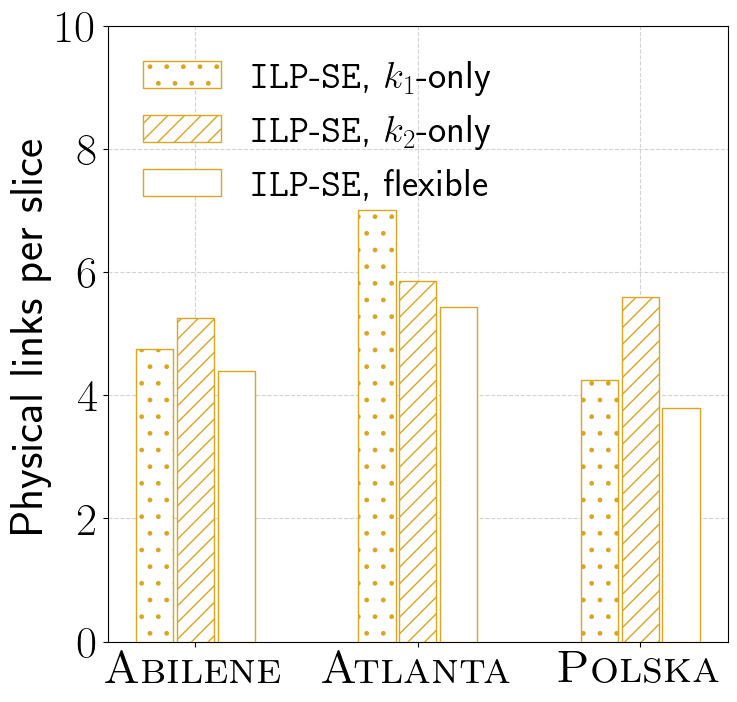

In [14]:
x_base = 0
solvername = "ILP_GUROBI"
slicecount = 10

obj_plt = plt.figure(0, figsize=figsize, dpi=dpi)
time_plt = plt.figure(1, figsize=figsize, dpi=dpi)


xticks_loc = [x_base+i*(groupstep+barwidth)+math.floor(len(SETTING_KEYS)/2)*(step+barwidth) for i in range(len(NET_KEYS))]
for net_key_ind in range(len(NET_KEYS)):
    net_key = NET_KEYS[net_key_ind]
    
    for setting_key_ind in range(len(SETTING_KEYS)):
        setting_key = SETTING_KEYS[setting_key_ind]
        setname = f"{setting_key}_{net_key}_{slicecount}"
        
        # print(setname, solvername)
        setname_ind = SETNAME_GROUPS[setname]
        solvername_ind = SOLVERNAME_GROUPS[solvername]
        
        loc = [i for i in setname_ind if i in solvername_ind]
        
        if not len(loc) == 1:
            continue
        
        loc = loc[0]
        
        data = df_clean.loc[loc]
        
        nhops = float(data['totalphysicallinks'])/data['objvalue']
        
        plt.figure(0)
        plt.bar(
            x=x_base + net_key_ind*(barwidth+groupstep) + setting_key_ind*(barwidth+step),
            height=nhops,
            width=barwidth,
            edgecolor=colors[0],
            hatch=hatchs[setting_key_ind],
            label=f"{SOLVER_LABELS[0]}, {SETTING_LABELS[setting_key_ind]}" if net_key_ind == 0 else None,
            fill=True,
            color='w',
            zorder=3
        )
        
plt.figure(0)
plt.ylabel(r"Physical links per slice")
# plt.figure()
plt.grid(color='lightgrey', linestyle='--', zorder=0)
plt.ylim([0,10])
plt.legend(loc='upper left', ncols=1, prop={'size':28}, framealpha=0)
plt.xticks(ticks=xticks_loc, labels=NET_LABELS)
plt.savefig(f"{FIGPATH}/linkhop_ilp.pdf",bbox_inches='tight')
# plt.show()

plt.show()

<Figure size 800x800 with 0 Axes>

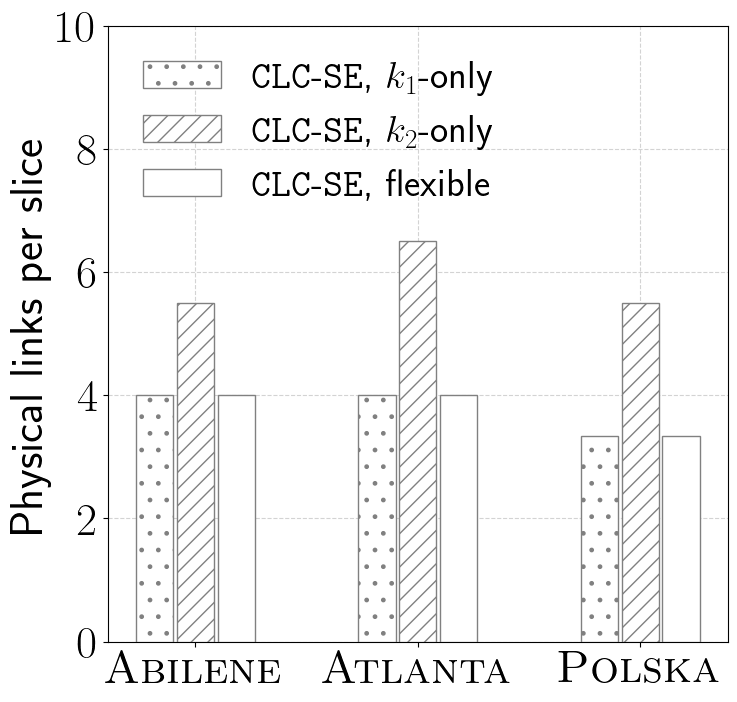

In [15]:
x_base = 0
solvername = "GREEDY"
slicecount = 10

obj_plt = plt.figure(0, figsize=figsize, dpi=dpi)
time_plt = plt.figure(1, figsize=figsize, dpi=dpi)


xticks_loc = [x_base+i*(groupstep+barwidth)+math.floor(len(SETTING_KEYS)/2)*(step+barwidth) for i in range(len(NET_KEYS))]
for net_key_ind in range(len(NET_KEYS)):
    net_key = NET_KEYS[net_key_ind]
    
    for setting_key_ind in range(len(SETTING_KEYS)):
        setting_key = SETTING_KEYS[setting_key_ind]
        setname = f"{setting_key}_{net_key}_{slicecount}"
        
        # print(setname, solvername)
        setname_ind = SETNAME_GROUPS[setname]
        solvername_ind = SOLVERNAME_GROUPS[solvername]
        
        loc = [i for i in setname_ind if i in solvername_ind]
        
        if not len(loc) == 1:
            continue
        
        loc = loc[0]
        
        data = df_clean.loc[loc]
        
        nhops = float(data['totalphysicallinks'])/data['objvalue']
        
        plt.figure(0)
        plt.bar(
            x=x_base + net_key_ind*(barwidth+groupstep) + setting_key_ind*(barwidth+step),
            height=nhops,
            width=barwidth,
            edgecolor=colors[1],
            hatch=hatchs[setting_key_ind],
            label=f"{SOLVER_LABELS[1]}, {SETTING_LABELS[setting_key_ind]}" if net_key_ind == 0 else None,
            fill=True,
            color='w',
            zorder=3
        )
        
plt.figure(0)
plt.ylabel(r"Physical links per slice")
# plt.figure()
plt.grid(color='lightgrey', linestyle='--', zorder=0)
plt.ylim([0,10])
plt.legend(loc='upper left', ncols=1, prop={'size':28}, framealpha=0)
plt.xticks(ticks=xticks_loc, labels=NET_LABELS)
plt.savefig(f"{FIGPATH}/linkhop_clc.pdf",bbox_inches='tight')
# plt.show()

plt.show()

<Figure size 800x800 with 0 Axes>

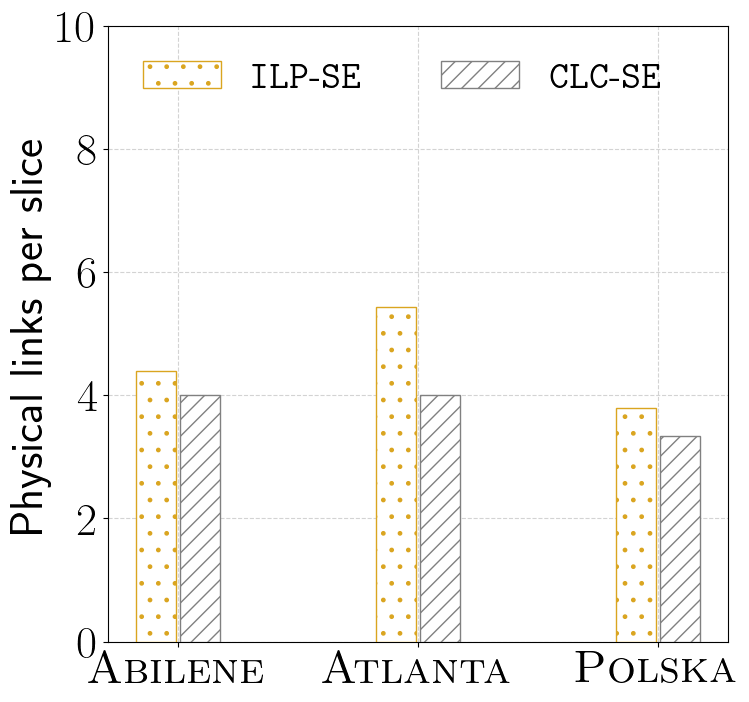

In [16]:
x_base = 0
setting_key = "C13"
slicecount = 10

obj_plt = plt.figure(0, figsize=figsize, dpi=dpi)
time_plt = plt.figure(1, figsize=figsize, dpi=dpi)


xticks_loc = [x_base+i*(groupstep+barwidth)+(math.floor(len(SOLVER_KEYS)/2)-0.5)*(step+barwidth) for i in range(len(NET_KEYS))]

for net_key_ind in range(len(NET_KEYS)):
    net_key = NET_KEYS[net_key_ind]
    
    for solver_key_ind in range(len(SOLVER_KEYS)):
        solver_key = SOLVER_KEYS[solver_key_ind]
        
        setname = f"{setting_key}_{net_key}_{slicecount}"
        
        # print(setname, solvername)
        setname_ind = SETNAME_GROUPS[setname]
        solvername_ind = SOLVERNAME_GROUPS[solver_key]
        
        loc = [i for i in setname_ind if i in solvername_ind]
        
        if not len(loc) == 1:
            continue
        
        loc = loc[0]
        
        data = df_clean.loc[loc]
        
        nhops = float(data['totalphysicallinks'])/data['objvalue']
        
        plt.figure(0)
        plt.bar(
            x=x_base + net_key_ind*(barwidth+groupstep) + solver_key_ind*(barwidth+step),
            height=nhops,
            width=barwidth,
            edgecolor=colors[solver_key_ind],
            hatch=hatchs[solver_key_ind],
            label=SOLVER_LABELS[solver_key_ind] if net_key_ind == 0 else None,
            fill=True,
            color='w',
            zorder=3
        )
        
plt.figure(0)
plt.ylabel(r"Physical links per slice")
# plt.figure()
plt.grid(color='lightgrey', linestyle='--', zorder=0)
plt.ylim([0,10])
plt.legend(loc='upper left', ncols=2, prop={'size':28}, framealpha=0)
plt.xticks(ticks=xticks_loc, labels=NET_LABELS)
plt.savefig(f"{FIGPATH}/linkhop_flex.pdf",bbox_inches='tight')
# plt.show()
plt.show()

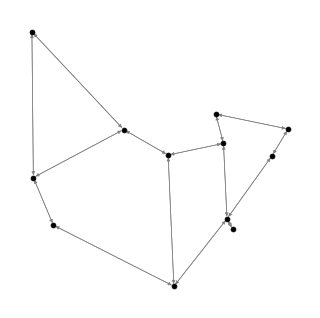

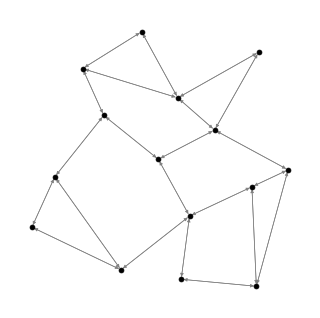

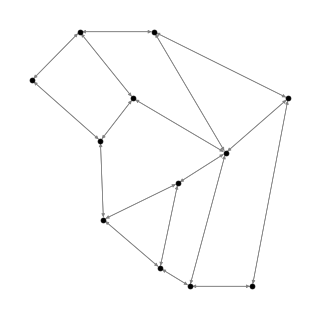

In [19]:
from FlexSliceMappingProblem import LoadProblem
import networkx as nx

def drawPhy(path, name, figsize):
    net = LoadProblem(path).PHY

    f = plt.figure(figsize=figsize, dpi=50)
    nx.draw_networkx(
        net, pos = net.NodeLocations,
        with_labels=False,
        node_color="k",
        edge_color="grey",
        node_shape="o",
        node_size=50
    )
    f.patch.set_alpha(0)
    plt.box(False)
    plt.savefig(f"{FIGPATH}/{name}.pdf", bbox_inches="tight")
    plt.show()
    
drawPhy(path="./data/problems/C13_ABI_10/graphmapping_146cfff1.pkl.gz", name="abilene",figsize=(8,8))
drawPhy(path="./data/problems/C13_ATL_10/graphmapping_01c06d93.pkl.gz", name="atlanta",figsize=(8,8))
drawPhy(path="./data/problems/C13_POL_10/graphmapping_ec80fed3.pkl.gz", name="polska",figsize=(8,8))

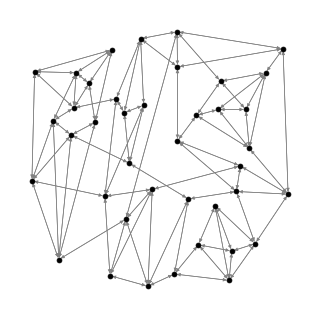

In [20]:
drawPhy(path="./data/problems/C13_PIO_30/graphmapping_c9a2c998.pkl.gz", name="pioro40",figsize=(8,8))